# Module: latticevectors

This module contains functions related to determining the lattice vectors, and making use of them in subsequent calculations.  This includes obtaining an initial guess at the lattice vectors, calculating refined fits to the lattice vectors at each diffraction pattern, strain mapping, and orientation mapping.

## Submodule: initialguess_manualselection

In this notebook, an initial guess at the lattice vectors is obtained by manually selecting peaks in the Bragg vector map.

### Import packages, load data

In [1]:
import py4DSTEM

import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage.filters import gaussian_filter
from skimage.transform import radon

from py4DSTEM.file.datastructure import PointList
from py4DSTEM.file.io import FileBrowser, read, append

from py4DSTEM.process.latticevectors import get_radon_scores, get_lattice_directions_from_scores, get_lattice_vector_lengths

In [2]:
# Examine file contents

fp = "/home/ben/Data/20180905_FePO4_unlithiated/processing/Stack1_processing.h5"
browser = FileBrowser(fp)
browser.show_dataobjects()

 Index                  Name                        Type        
   0    datacube                            DataCube            
   1    braggvectormap_shiftcorrected_ellipsecorrectedDiffractionSlice    
   2    braggvectormap_uncorrected          DiffractionSlice    
   3    probe                               DiffractionSlice    
   4    diffraction_shifts                  RealSlice           
   5    strain_map                          RealSlice           
   6    uv_map                              RealSlice           
   7    lattice_vectors                     PointList           
   8    braggpeaks                          PointListArray      
   9    braggpeaks_shifted_ellipticalcorrectedPointListArray      


In [3]:
# Load data

braggvectormap = browser.get_dataobject('braggvectormap_shiftcorrected_ellipsecorrected').data2D
browser.close()

### Get lattice vectors

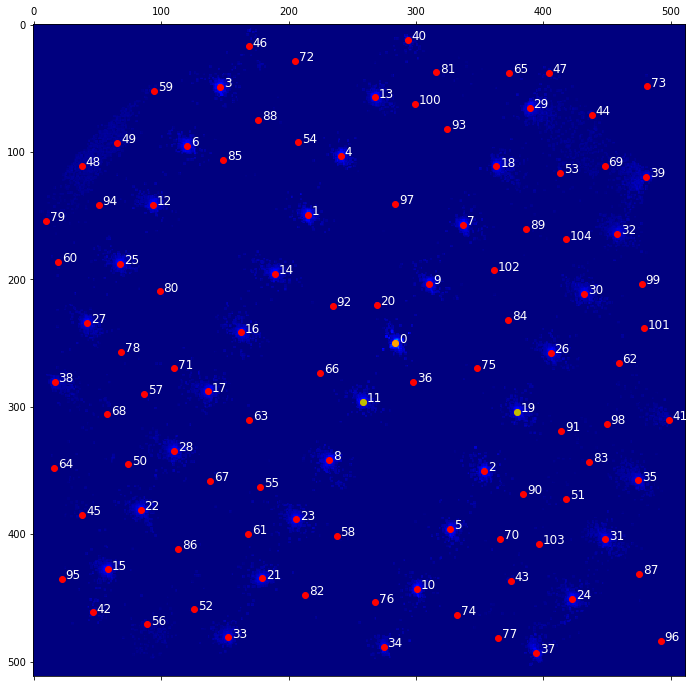

In [11]:
######## Parameters ########

# Select peak indices
center_index = 0
u_index = 11
v_index = 19

# Peak detection parameters
sigma = 2
edgeBoundary = 10
minSpacing = 30
minRelativeIntensity = 0.005
maxNumPeaks = 100

# Display parameters
power=0.25
textoffset = 3

############################

maxima_x,maxima_y,_ = py4DSTEM.process.utils.get_maxima_2D(braggvectormap,sigma,edgeBoundary,minSpacing,
                                                           minRelativeIntensity,maxNumPeaks)

fig,ax = plt.subplots(figsize=(12,12))
ax.matshow(braggvectormap**power,cmap='jet')
ax.scatter(maxima_y,maxima_x,color='r')
ax.scatter(maxima_y[center_index],maxima_x[center_index],color='orange')
ax.scatter((maxima_y[u_index],maxima_y[v_index]),(maxima_x[u_index],maxima_x[v_index]),color='y')
for i in range(len(maxima_x)):
    ax.text(maxima_y[i]+textoffset,maxima_x[i],"{}".format(i),color='w',size=12)
plt.show()

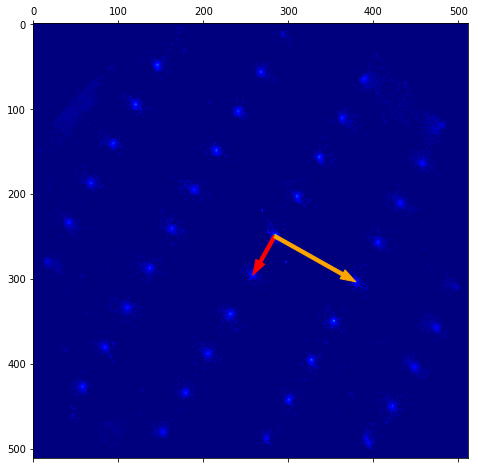

In [12]:
# Show
x0,y0 = maxima_x[center_index],maxima_y[center_index]
u_dx = maxima_x[u_index]-x0
u_dy = maxima_y[u_index]-y0
v_dx = maxima_x[v_index]-x0
v_dy = maxima_y[v_index]-y0

fig,ax = plt.subplots(figsize=(8,8))
ax.matshow(braggvectormap**power,cmap='jet')
ax.arrow(y0,x0,u_dy,u_dx, color='red',width=4,length_includes_head=True)
ax.arrow(y0,x0,v_dy,v_dx, color='orange',width=4,length_includes_head=True)
plt.show()